In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

#### loading data 

In [4]:
ipl_matches = pd.read_csv('THE_DATA/PROJECT_02_IPL/IPL_Matches_2008_2022.csv')

#### cleaning data

In [5]:
ipl = ipl_matches.drop(['ID', 'City', 'Team1Players', 'Team2Players', 'Umpire1', 'Umpire2', 'Date'], axis = 1)
ipl

,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match
0,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya
1,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler
2,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar
3,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller
4,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar
...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,N,Kolkata Knight Riders,Wickets,5.0,NaN,DJ Hussey
946,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,N,Royal Challengers Bangalore,Wickets,5.0,NaN,MV Boucher
947,2007/08,3,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,N,Delhi Daredevils,Wickets,9.0,NaN,MF Maharoof
948,2007/08,2,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,N,Chennai Super Kings,Runs,33.0,NaN,MEK Hussey


In [6]:
victory = ipl['WinningTeam'].value_counts()

top_7_teams = victory.head(7).index.tolist()

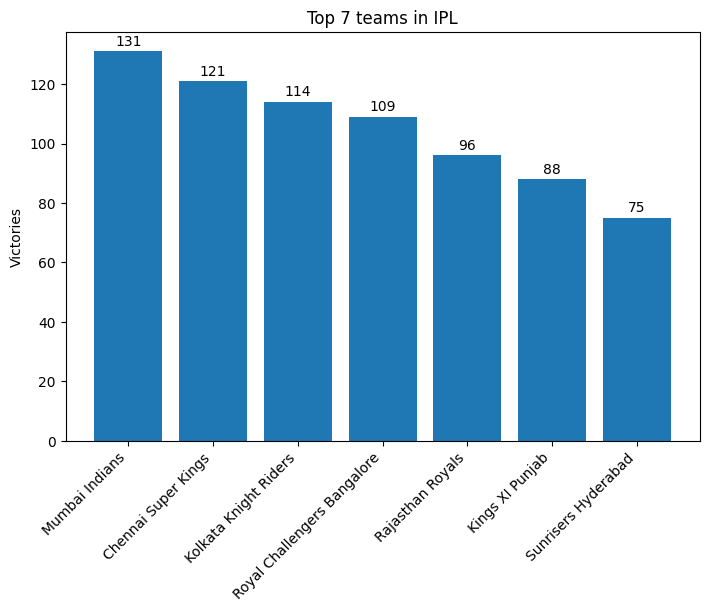

In [7]:
labels = top_7_teams
values = [victory[team] for team in labels]

plt.figure(figsize = (7,6))

bars = plt.bar(labels, values)

plt.xticks(rotation = 45, ha = 'right' )
plt.tight_layout()
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom')

plt.ylabel('Victories')
plt.title('Top 7 teams in IPL')

plt.show()

#### win percentage 

In [8]:
team_1 = ipl['Team1'].value_counts()
team_2 = ipl['Team2'].value_counts()

total_matches = team_1.add(team_2, fill_value = 0).astype(int)


match_won = ipl['WinningTeam'].value_counts()

match_won = match_won.sort_values(ascending = False)

In [16]:
win_percentage = (match_won / total_matches) * 100
win_percentage = win_percentage.sort_values(ascending = False).head(7)

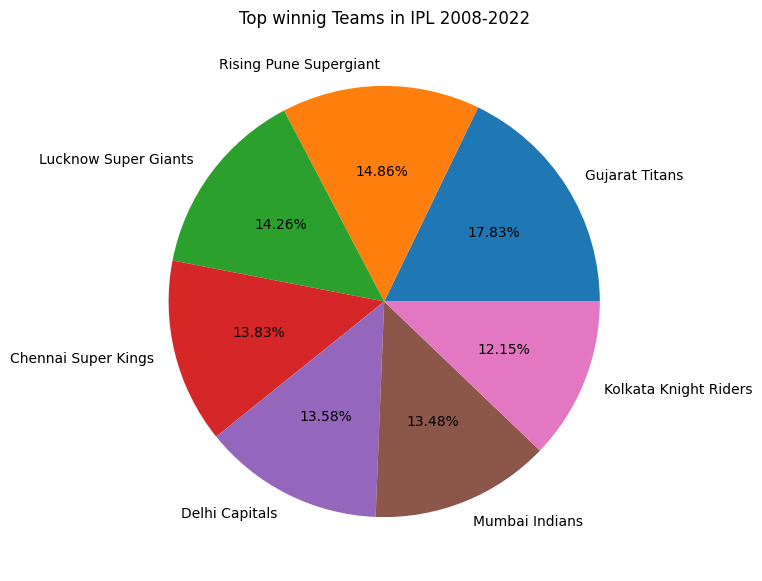

In [19]:
sizes = win_percentage.values
labels = win_percentage.index

plt.figure(figsize = (7,7))
plt.pie(sizes ,labels = labels , autopct = '%.2f%%')
plt.title('Top winnig Teams in IPL 2008-2022')

plt.show()

#### TOSS Trends 

In [20]:
toss_match = ipl.loc[ipl['TossWinner'] == ipl['WinningTeam']].count()[0] 
toss_no_match = ipl.loc[ipl['TossWinner'] != ipl['WinningTeam']].count()[0]

C:\Users\gaura\AppData\Local\Temp\ipykernel_5968\838970704.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  toss_match = ipl.loc[ipl['TossWinner'] == ipl['WinningTeam']].count()[0]
C:\Users\gaura\AppData\Local\Temp\ipykernel_5968\838970704.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  toss_no_match = ipl.loc[ipl['TossWinner'] != ipl['WinningTeam']].count()[0]


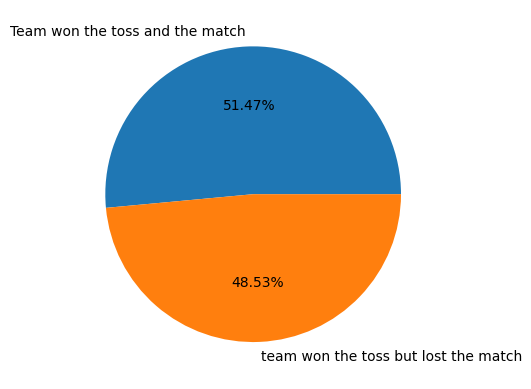

In [21]:
labels = ['Team won the toss and the match', 'team won the toss but lost the match']
sizes = [toss_match, toss_no_match]

plt.pie(sizes, labels = labels, autopct = '%.2f%%')
plt.show()

#### venue data

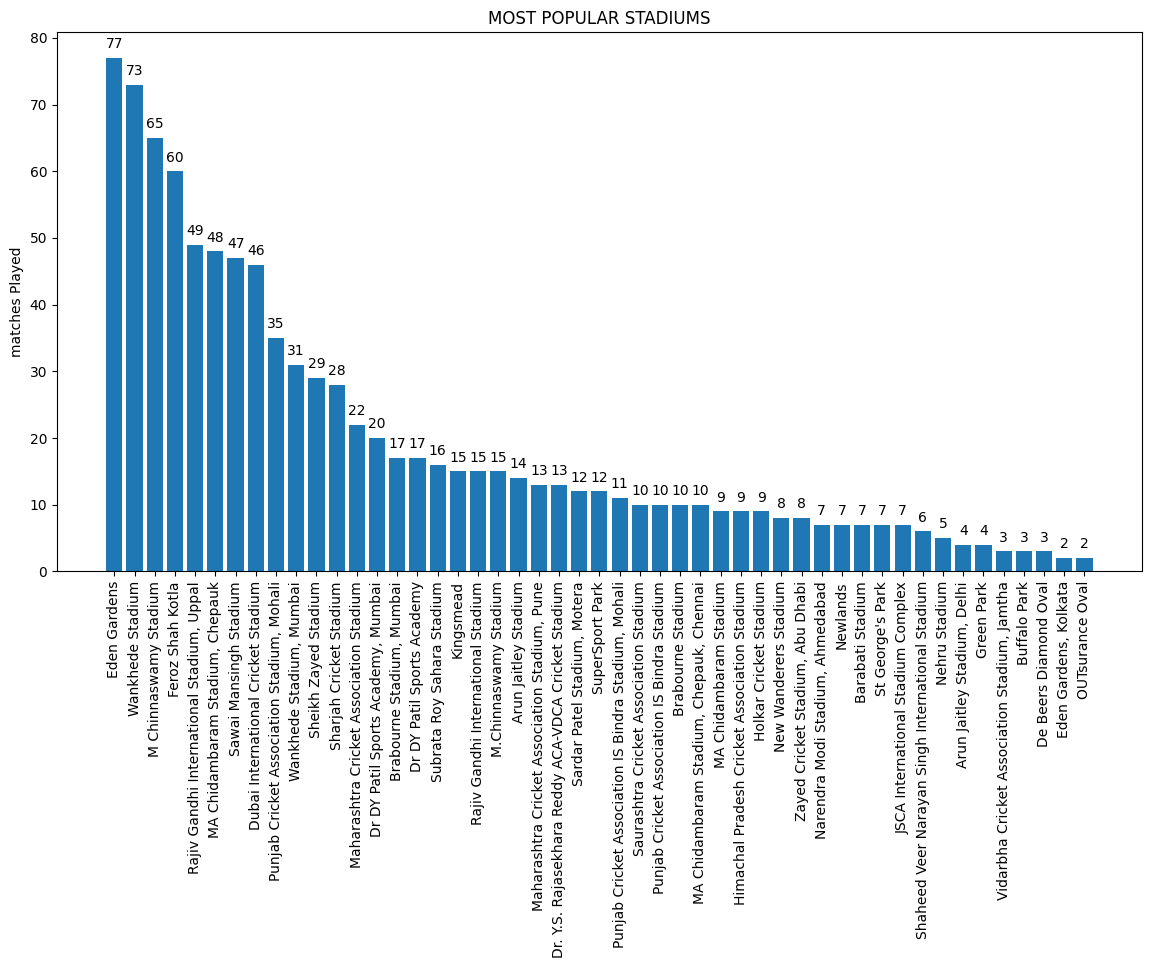

In [33]:
venue = ipl['Venue'].value_counts()

plt.figure(figsize = (14,7))
bars = plt.bar(venue.index, venue.values)
plt.xticks(rotation = 90)
plt.ylabel('matches Played')
plt.title('MOST POPULAR STADIUMS')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom')

plt.show()